Clustering

In [2]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
data = pd.read_excel('input/Online-Retail.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
nullValues = pd.isnull(data).sum()
nullValues[nullValues>0]

Description      1454
CustomerID     135080
dtype: int64

In [6]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Malta', 'RSA'], dtype=object)

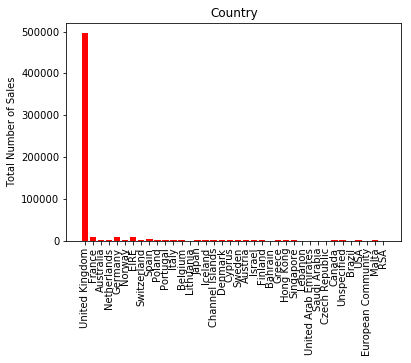

In [7]:
#total sales per country.
labels, values = zip(*Counter(data.Country).items())
y_pos = np.arange(len(labels))
plt.bar(y_pos, values, align='center', alpha=1.0,color="red")
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Total Number of Sales')
plt.title('Country')
plt.figure(num=None, figsize=(30, 20), dpi=1000, facecolor='w', edgecolor='k') 
plt.show()

In [8]:
data = data[data['Country'] == 'United Kingdom']

In [9]:
data = data[data['CustomerID'].notnull()]

In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
data['ItemReturn'] = pd.Series((n for n in data.InvoiceNo), index=data.index)
data['PurchaseInvoice'] = pd.Series((n for n in data.InvoiceNo), index=data.index)

In [12]:
data.loc[data.InvoiceNo.str.contains("c") == True, 'ItemReturn'] = 'True'
data.loc[data.ItemReturn != 'True', 'ItemReturn'] = 'False' 
data.loc[data.ItemReturn == 'True', 'PurchaseInvoice'] = 0
data.loc[data.ItemReturn == 'False', 'PurchaseInvoice'] = 1

In [13]:
data.UnitPrice.min()

0.0

In [14]:
data.Quantity.min()

-80995

In [15]:
data = data[data['Quantity'] > 0]

In [16]:
def find_unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
find_unique_counts(data)

InvoiceNo :  16649
StockCode :  3645
Description :  3844
Quantity :  294
InvoiceDate :  15615
UnitPrice :  403
CustomerID :  3921
Country :  1
ItemReturn :  1
PurchaseInvoice :  1


In [17]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemReturn,PurchaseInvoice,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,20.34



To Calculate Recency it is important to understand when was the last purchase happened. As can be seen, the dataset has last invoice date as 2011-12-09 12:49:00. So we are setting 2011-12-10 as the day from recency will be calcuated.

Also, all the RFM variabls are grouped at each customer level.

In [19]:
data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [20]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [21]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [22]:
rfmtable = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

In [23]:
rfmtable.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [24]:
rfmtable = rfmtable.rename(columns= {'InvoiceDate': 'recency', 'InvoiceNo': 'frequency', 'TotalPrice': 'monetary_value'})

In [25]:
rfmtable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [26]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

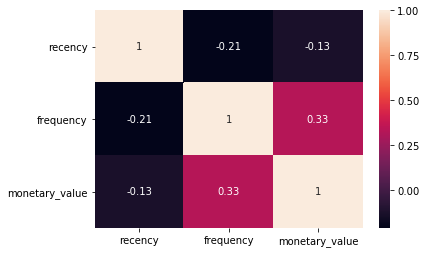

In [28]:
import seaborn as sns
%matplotlib inline
sns.heatmap(rfmtable.corr(),annot=True)

Above is the correlation coefficient matrix between various RFM variables. 

# KMeans Clustering

Below is the clustering on original matrix and clearly it is not interpretable. The Data points clumped on the left side corner and there are few outliers here and there. The data is clearly skewed which means we need to transform the variable. We will do Log Transformation in next step.

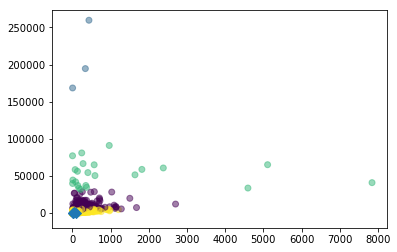

In [31]:
kmeans = KMeans(n_clusters = 4);

kmeans.fit(rfmtable);
labels = kmeans.predict(rfmtable);

xs = rfmtable['frequency'];
ys = rfmtable['monetary_value'];

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5);

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_;

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0];
centroids_y = centroids[:,1];

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50);
plt.show();

In [32]:
#Take Log by using Numpy
r_log = np.log(rfmtable['recency']+0.1) 
f_log = np.log(rfmtable['frequency'])
m_log = np.log(rfmtable['monetary_value']+0.1)
l_data = pd.DataFrame({'recency': r_log,'frequency': f_log,'monetary_value': m_log})
# Standardizing the data as z scores
standard = lambda values : (values - values.mean() )/values.std()
finaldata=l_data.apply(standard)

Silhouette score : 0.297184644474


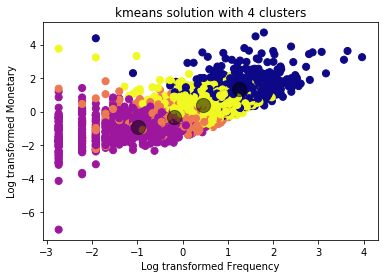

In [34]:
from sklearn.metrics import silhouette_score
#labels = pipe.predict(rfmtable)
#
km = KMeans(init='k-means++',n_clusters=4,n_init=10)
km.fit(finaldata)
labels = km.predict(finaldata)
sscore = silhouette_score(finaldata, labels)
print("Silhouette score :", sscore)
#create a scatter plot
plt.scatter(finaldata.ix[:, 0], finaldata.ix[:, 1], c=labels, s=50, cmap='plasma')
#select cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Log transformed Frequency')
plt.ylabel('Log transformed Monetary')
plt.title('kmeans solution with 4 clusters')

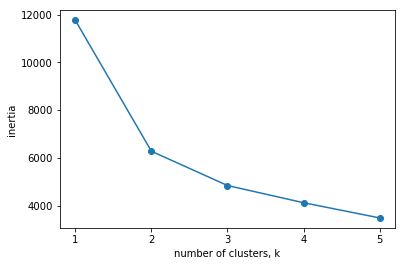

In [36]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k);
    
    # Fit model to samples
    model.fit(finaldata);
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_);
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Here, I have applied same data on GMM models and used 2 clusters. The results as such are not better for that matter.

/Users/anupambanerjee/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anupambanerjee/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anupambanerjee/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anupambanerjee

Average Silhouette score with 2 cluster GMM : 0.39481849679


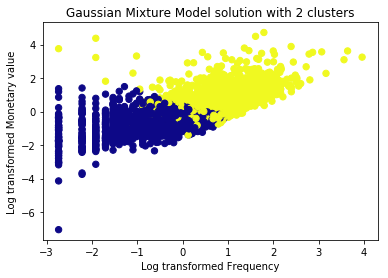

In [39]:
from sklearn.mixture import GMM
gmm = GMM(n_components=2).fit(finaldata)
cluster_labels = gmm.predict(finaldata)
score = silhouette_score(finaldata,cluster_labels)
print("Average Silhouette score with 2 cluster GMM :", score)
plt.scatter(finaldata.ix[:, 0], finaldata.ix[:, 1], c=cluster_labels, s=40, cmap='plasma')
plt.xlabel('Log transformed Frequency')
plt.ylabel('Log transformed Monetary value')
plt.title('Gaussian Mixture Model solution with 2 clusters')